In [2]:
from sklearn import datasets #sklearn é uma das lib mais utilizadas em ML, ela contém, além dos 
                            #datasets, várias outras funções úteis para a análise de dados
                            # essa lib será sua amiga durante toda sua carreira
import pandas as pd  # importa a lib Pandas. Essa lib é utilizada para lidar com dataframes (TABELAS) 
                     #de forma mais amigável. 
from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict # esse método é utilizado para dividir o 
                                                    # conjunto de dados em grupos de treinamento e test
from sklearn.svm import SVC      #importa o algoritmo svm para ser utilizado 
from sklearn import tree         # importa o algoritmo arvore de decisão
from sklearn.linear_model import LogisticRegression #importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2
from sklearn import metrics  #utilizada para as métricas de comparação entre os métodos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


In [4]:
got_dataset=pd.read_csv('../input/game-of-thrones/character-predictions.csv')

In [5]:
pd.set_option('display.max_columns', None)
got_dataset.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [6]:
got_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [7]:
nans = got_dataset.isna().sum()
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [8]:
got_dataset.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#analisando os dados nulus
print(got_dataset["age"].mean())


-1293.5635103926097


In [12]:
#realizando uma maior análise do dataset
print(got_dataset["name"][got_dataset["age"] < 0])
print(got_dataset['age'][got_dataset['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [13]:
#substituindo os valores negativos
got_dataset.loc[1684, "age"] = 25.0
got_dataset.loc[1868, "age"] = 0.0

In [14]:
print(got_dataset["age"].mean())

36.70438799076212


**Tratando dados nulos**

In [15]:
#trabalhando com dados nulos
got_dataset["age"].fillna(got_dataset["age"].mean(), inplace=True) #substituindo os valores nulos pela média da coluna
got_dataset["culture"].fillna("", inplace=True) #preenchendo os valores nulos da coluna cultura com uma string nula

# preenchendo os demais valores com -1
got_dataset.fillna(value=-1, inplace=True)

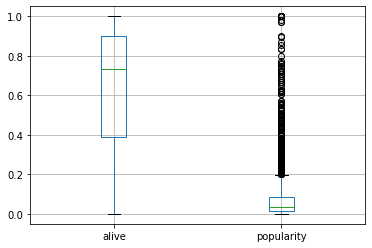

In [16]:
#realizando o boxplot
got_dataset.boxplot(['alive', 'popularity'])

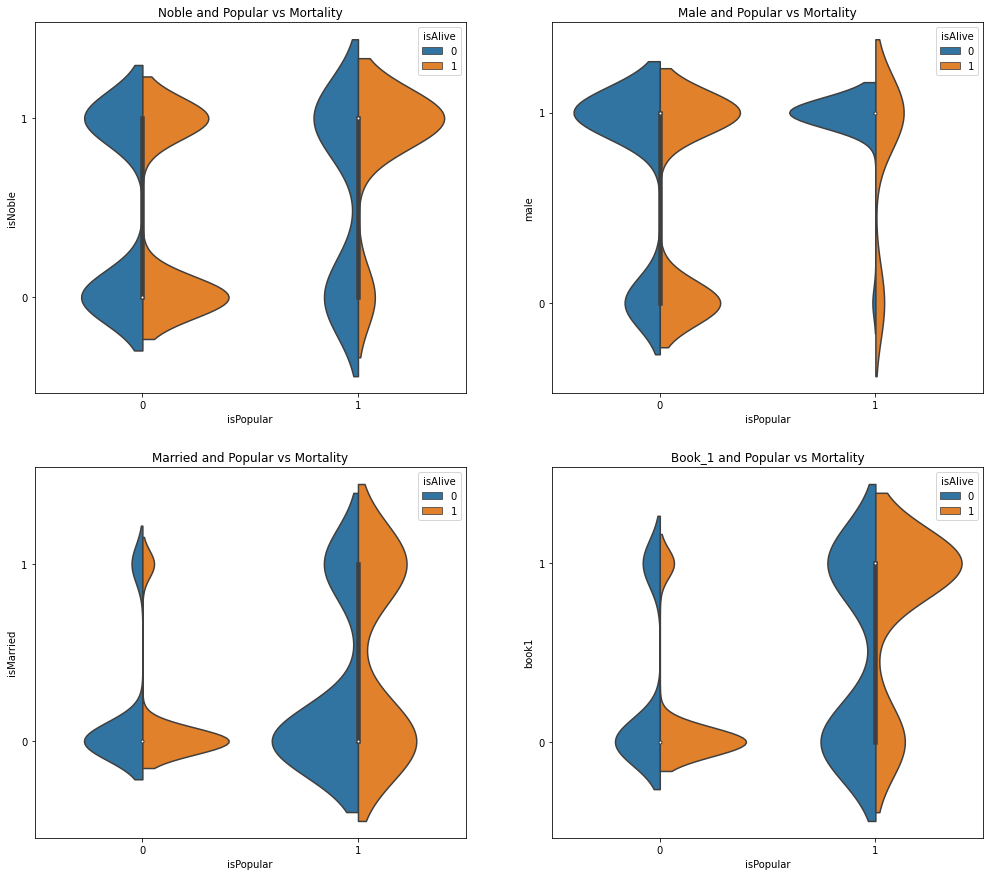

In [17]:
#analisando a "mortalidade" dos personagens
import warnings
warnings.filterwarnings('ignore')
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot("isPopular", "isNoble", hue="isAlive", data=got_dataset ,split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot("isPopular", "male", hue="isAlive", data=got_dataset ,split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot("isPopular", "isMarried", hue="isAlive", data=got_dataset ,split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot("isPopular", "book1", hue="isAlive", data=got_dataset ,split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book_1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))


plt.show()

In [18]:
# Retirando algumas colunas 
drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
got_dataset.drop(drop, inplace=True, axis=1)

#Salvando uma cópia do dataset para aplicar o hotencoder
got_dataset_2 = got_dataset.copy(deep=True)

**Trabalhando com dados categóricos**

In [19]:
# transformando os dados categóricos em one-hot-encoder
got_dataset = pd.get_dummies(got_dataset)

In [20]:
got_dataset.head()

,actual,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,title_-1,title_Acorn Hall,title_Andals,title_Arbor,title_Archmaester,title_Ashford,title_Banefort,title_Barrowton,title_Bear Island,title_Big BucketThe Wull,title_Bitterbridge,title_Black Wind,title_Blackcrown,title_Blackmont,title_Blacktyde,title_Bloodrider,title_Blue Grace,title_Brightwater,title_Broad Arch,title_Brother,title_BrotherProctor,title_Captain,title_Captain of the guard,title_Captain-General,title_Castellan,title_Castellan of Harrenhal,title_CastellanCommander,title_Casterly Rock,title_Castle Lychester,title_Cerwyn,title_Chief Undergaoler,title_Claw Isle,title_Cobblecat,title_Coldmoat,title_Coldwater Burn,title_Commander of the City Watch,title_Commander of the Second Sons,title_Crag,title_Crakehall,title_Cupbearer,title_Darry,title_Deepwood Motte,title_Dragonstone,title_Dreadfort,title_Duskendale,title_Dyre Den,title_Eastwatch-by-the-Sea,title_Eyrie,title_Fair Isle,title_Feastfires,title_Felwood,title_First Builder,title_First Ranger,title_First Sword of Braavos,title_Foamdrinker,title_Ghost Hill,title_Godsgrace,title_Godswife,title_Golden Storm,title_Golden Tooth,title_Goldengrove,title_Goldgrass,title_Good Master,title_Goodman,title_Goodwife,title_Grand Maester,title_Grassy Vale,title_Green Grace,title_Greenshield,title_Greenstone,title_Grey Glen,title_Greywater Watch,title_Gulltown,title_Hand of the King,title_Harlaw,title_Harrenhal,title_Harridan Hill,title_Hayford,title_Haystack Hall,title_Heart's Home,title_High Septon,title_High Steward of Highgarden,title_Highgarden,title_Hightower,title_Horn Hill,title_Hornvale,title_Hornwood,title_Iron Islands,title_Ironoaks,title_Karhold,title_Karl's Hold,title_Kayce,title_Keeper of the Gates of the Moon,title_Khal,title_KhalKo (formerly),title_Khalakka,title_King,title_King in the North,title_King of Astapor,title_King of Winter,title_King of the Andals,title_King of the Iron Islands,title_King-Beyond-the-Wall,title_Knight,title_Knight of Griffin's Roost,title_Lady,title_Lady Marya,title_Lady of Bear Island,title_Lady of Darry,title_Lady of Torrhen's Square,title_Lady of the Leaves,title_Lady of the Vale,title_LadyQueen,title_LadyQueenDowager Queen,title_Last Hearth,title_Light of the West,title_Lonely Light,title_Longbow Hall,title_Longsister,title_Longtable,title_Lord,title_Lord Captain of the Iron Fleet,title_Lord Commander of the Night's Watch,title_Lord Paramount of the Mander,title_Lord Paramount of the Stormlands,title_Lord Paramount of the Trident,title_Lord Reaper of Pyke,title_Lord Seneschal,title_Lord Steward,title_Lord Steward of the Iron Islands,title_Lord of Atranta,title_Lord of Blackhaven,title_Lord of Coldmoat,title_Lord of Crows Nest,title_Lord of Darry,title_Lord of Dragonstone,title_Lord of Flint's Finger,title_Lord of Greyshield,title_Lord of Griffin's Roost,title_Lord of Hammerhorn,title_Lord of Harrenhal,title_Lord of Hellholt,title_Lord of Honeyholt,title_Lord of Iron Holt,title_Lord of Kingsgrave,title_Lord of Oakenshield,title_Lord of Oldcastle,title_Lord of Pebbleton,title_Lord of Southshield,title_Lord of Starfall,title_Lord of Sunflower Hall,title_Lord of White Harbor,title_Lord of the Crossing,title_Lord of the Deep Den,title_Lord of the Hornwood,title_Lord of the Iron Islands,title_Lord of the Marches,title_Lord of the Red Dunes,title_Lord of the Seven Kingdoms,title_Lord of the Snakewood,title_Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw,title_Lord of the Tides,title_Lord of the Tor,title_LordWisdom,title_Lordsport,title_Maester,title_Magister,title_Magister of Pentos,title_Magnar of Thenn,title_Maidenpool,title_Master of Coin,title_Master of Deepwood Motte,title_Master of Harlaw Hall,title_Master of Whisperers,title_Master of coin,title_Master of whisperers,title_Master-at-Arms,title_Mistress of whisperers,title_Nightsong,title_Oakenshi

**Iniciando a construção do pipeline do algoritimo**

In [26]:
#Separando o dataset entre entradas e saídas
x = got_dataset.iloc[:,1:].values
y = got_dataset.iloc[:, 0].values

In [27]:
# aplicando o modelo de validação cruzada
# divide o dataset entre 5 diferentes grupos
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
print(kfold.get_n_splits())

5


In [29]:
# construindo os modelos de classificação
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42), 
          DecisionTreeClassifier(random_state=42), svm.SVC(kernel='rbf', gamma='scale', random_state=42), 
          KNeighborsClassifier()]

In [30]:
#utilizando a validação cruzada
mean=[]
std=[]
for model in modelos:
    result = cross_val_score(model, x, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)
    std.append(result)

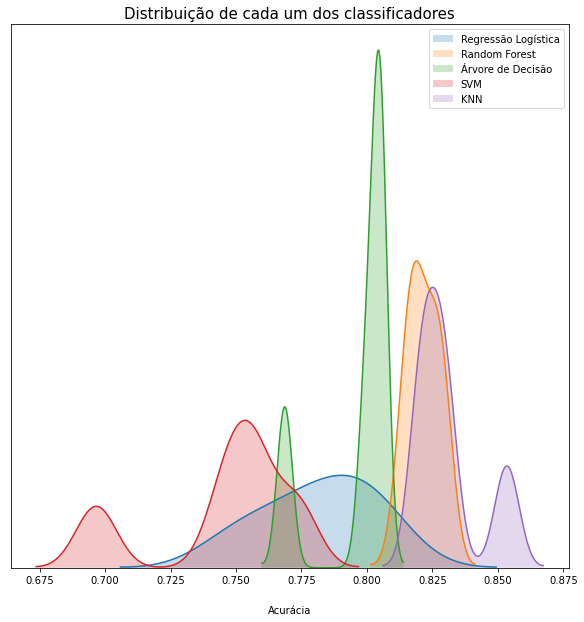

In [31]:
classificadores=['Regressão Logística', 'Random Forest', 'Árvore de Decisão', 'SVM', 'KNN']

plt.figure(figsize=(10, 10))
for i in range(len(mean)):
    sns.distplot(mean[i], hist=False, kde_kws={"shade": True})
    
plt.title("Distribuição de cada um dos classificadores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acurácia", labelpad=20)
plt.yticks([])

plt.show()

**Realizando a previsão dos classificadores**

In [32]:
# Dividindo o dataset entre treinamento 80% e teste 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, 
                                                    shuffle=True, random_state=42)

In [33]:
#escolhendo o svm e a floresta randomica
svm_clf = svm.SVC(C=0.9, gamma=0.1, kernel='rbf', probability=True, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

# Treina os modelos
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [35]:
# obtém as probabilidades previstas
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# Valores reais
svm_preds = np.argmax(svm_prob, axis=1)
rf_preds = np.argmax(rf_prob, axis=1)

[Text(570.5454545454544, 0.5, 'Valor Real'), Text(0.5, 24.0, 'Previsao')]

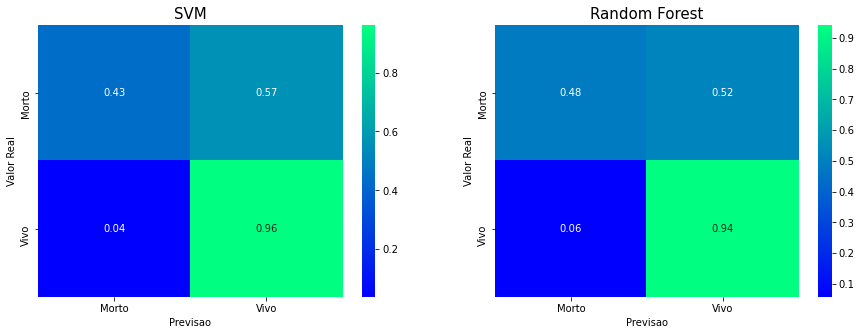

In [36]:
#analisando os modelos 
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[: , np.newaxis]

classes = ["Morto", "Vivo"]
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("SVM", fontsize=15.)
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="Previsao", ylabel="Valor Real")

ax[1].set_title("Random Forest", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes), 
            cmap='winter', annot=True, fmt='.2f', ax=ax[1]).set(xlabel="Previsao", 
                                                                ylabel="Valor Real")